# Text mining

Return to the [castle](https://github.com/Nkluge-correa/teeny-tiny_castle).

**Text mining, also referred to as _text data mining_, similar to text analytics, is the process of deriving high-quality [information](https://en.wikipedia.org/wiki/Information "Information") from [text](https://en.wikipedia.org/wiki/Plain_text "Plain text"). It involves "the discovery by computer of new, previously unknown information, by automatically extracting information from different written resources." Written resources may include [websites](https://en.wikipedia.org/wiki/Website "Website"), [books](https://en.wikipedia.org/wiki/Book "Book"), [emails](https://en.wikipedia.org/wiki/Email "Email"), [reviews](https://en.wikipedia.org/wiki/Review "Review"), and articles. High-quality information is typically obtained by devising patterns and trends by means such as [statistical pattern learning](https://en.wikipedia.org/wiki/Pattern_recognition "Pattern recognition").**

![image](https://noduslabs.com/wp-content/uploads/2011/12/figure-5-meaning-circulation-510x487.png)


In [2]:
import spacy
import scattertext
import pandas as pd


### Scattertext

**Scattertext is "_a Python package that lets you interactively visualize how two categories of text are different from each other_."**


In [2]:
df = pd.read_excel('data\google_play_apps_review(pt).xlsx')

df['score'] = df['score'].replace(
    {0: 'Negative Sentiment', 1: 'Positive Sentiment'})
df


,content,review,appId,lang,score
0,o aplicativo e bom disparadamente melhor que o...,4,org.telegram.messenger,pt,Positive Sentiment
1,aos que estao criticando o aplicativo por cont...,4,burgerking.com.br.appandroid,pt,Positive Sentiment
2,ze a proposta e muito boa o app e bem funciona...,4,com.cerveceriamodelo.modelonow,pt,Positive Sentiment
3,ja tenho encomendado varias vezes refeicoes e ...,4,com.ubercab.eats,pt,Positive Sentiment
4,gosto muito do app e ja usei varias vezes para...,4,com.grability.rappi,pt,Positive Sentiment
...,...,...,...,...,...
19995,e o app que eu passo mais tempo usando mas do ...,2,com.google.android.youtube,pt,Negative Sentiment
19996,e impossivel fica este aplicativo nao ta dando...,1,com.zhiliaoapp.musically,pt,Negative Sentiment
19997,eu tava gostando do appmais hoje venho reclama...,1,com.zhiliaoapp.musically,pt,Negative Sentiment
19998,o tiktok e um aplicativo muito fixe no entanto...,1,com.zhiliaoapp.musically,pt,Negative Sentiment


**Let's us use only the top `1000` lengthiest reviews (for both classes = [`Negative`, `Positive`]) to speed up our analysis.**


In [3]:
df_1 = df[df['score'] == 'Negative Sentiment']
df_1 = df_1.sort_values(
    by='content', key=lambda x: x.str.len(), ascending=False)
df_2 = df[df['score'] == 'Positive Sentiment']
df_2 = df_2.sort_values(
    by='content', key=lambda x: x.str.len(), ascending=False)

df_p = df_1.head(1000)
df_n = df_2.head(1000)

frames = [df_p, df_n]
df_google_play = pd.concat(frames)
df_google_play


,content,review,appId,lang,score
10000,se por qquer motivo o app e desinstalado e rei...,1,org.telegram.messenger,pt,Negative Sentiment
10001,dei uma estrela na avaliacao porque nao tinha ...,1,com.xiaojukeji.didi.brazil.customer,pt,Negative Sentiment
10002,a experiencia no tiktok ficou bem ruim princip...,2,com.zhiliaoapp.musically,pt,Negative Sentiment
10003,o aplicativo em si funciona apesar de ter prob...,1,com.cerveceriamodelo.modelonow,pt,Negative Sentiment
10004,para os novatos cuidado na minha primeira comp...,1,com.ubercab.eats,pt,Negative Sentiment
...,...,...,...,...,...
980,gosto da aplicacao e super pratica facil e com...,4,com.ubercab.eats,pt,Positive Sentiment
981,o app em si e bom atendimento da uber e pessim...,4,com.ubercab.eats,pt,Positive Sentiment
982,aplicativo muito pratico toda semana tem promo...,5,com.ubercab.eats,pt,Positive Sentiment
983,tive algumas experiencias bem frustrantes logo...,4,com.grability.rappi,pt,Positive Sentiment


**You can download the spacy `pt-Br` model by the following command line:**

```bash

python -m spacy download pt_core_news_sm

```


In [4]:

from IPython.display import display, HTML
nlp = spacy.load('pt_core_news_sm')

with open('data\stopwords_pt.txt', 'r') as fp:
    str_f = fp.read()
    set_stopwords = set(str_f.split('\n'))
    fp.close()

nlp.Defaults.stop_words |= set_stopwords

corpus = (scattertext.CorpusFromPandas(df_google_play,
                                       category_col='score',
                                       text_col='content',
                                       nlp=nlp)
          .build()
          .remove_terms(nlp.Defaults.stop_words, ignore_absences=True)
          )


corpus_dataframe = df_google_play
html = scattertext.produce_scattertext_explorer(
    corpus,
    category='Positive Sentiment',
    category_name='Positive Sentiment',
    not_category_name='Negative Sentiment',
    width_in_pixels=1000,
    metadata=corpus_dataframe['appId'])

html_file_name = "Scattertext_plot.html"
open(html_file_name, 'wb').write(html.encode('utf-8'))
display(HTML("<a href='Scattertext_plot.html' target='_blank'>Scattertext_plot.html</a>"))


### Textnets: text analysis with networks

**Textnets represents collections of texts as networks of documents and words. They provide novel possibilities for the visualization and analysis of texts.**

**The ideas underlying textnets are presented in this paper:**

> Christopher A. Bail, “[Combining natural language processing and network analysis to examine how advocacy organizations stimulate conversation on social media](https://doi.org/10.1073/pnas.1607151113),” _Proceedings of the National Academy of Sciences of the United States of America_ 113, no. 42 (2016), 11823–11828, doi:10.1073/pnas.1607151113.

**Textnets builds on [spaCy](https://spacy.io/), a state-of-the-art library for natural-language processing, and [igraph](http://igraph.org/python/) for network analysis. It uses the [Leiden algorithm](https://doi.org/10.1038/s41598-019-41695-z) for community detection, which is able to perform community detection on the bipartite (word–group) network.**


In [5]:
import textnets as tn
from textnets import Corpus
import unidecode
import string
tn.params['seed'] = 666  # To ensure that the results are reproducible


In [6]:
df_google_play['review'] = df_google_play['review'].replace(
    {1: 'Very Low Review', 2: 'Low Review',
     4: 'High Review', 5: 'Very High Review'})


net_size = 1  # controls the size of the created network
df_VL = df_google_play[df_google_play['review']
                       == 'Very Low Review'].head(net_size)
df_L = df_google_play[df_google_play['review'] == 'Low Review'].head(net_size)
df_VH = df_google_play[df_google_play['review']
                       == 'Very High Review'].head(net_size)
df_H = df_google_play[df_google_play['review'] == 'High Review'].head(net_size)

frames = [df_VL, df_L, df_H, df_VH]
dff = pd.concat(frames)
dff = dff.set_index('review')


**Isolated nodes are the result of a given term being found exactly `once in all evaluated reviwes`, which brings its `tf-idf` score `0`.**


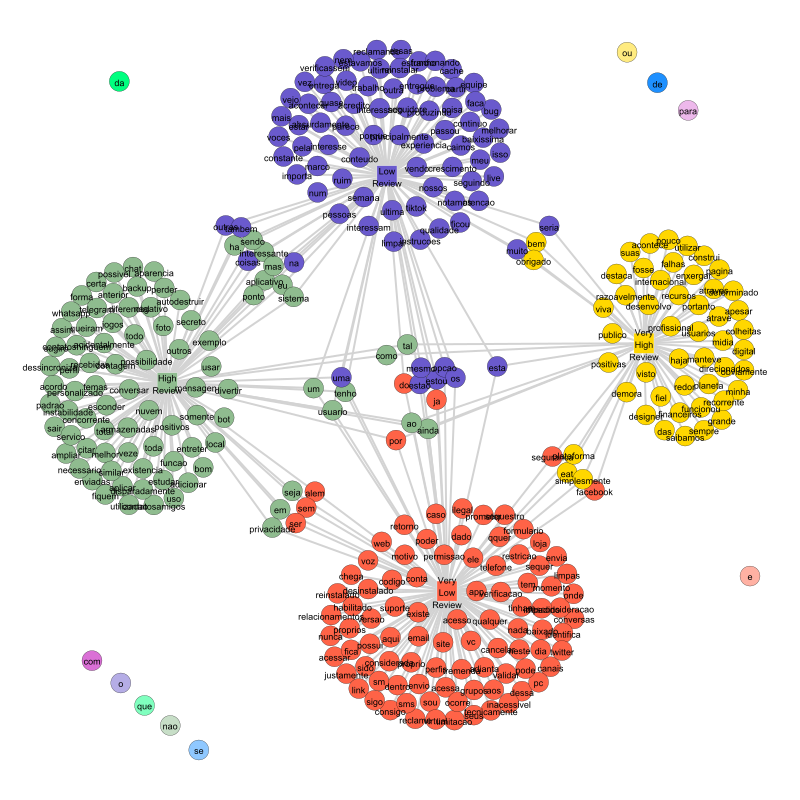

In [7]:
corpus = Corpus(dff['content'])

t = tn.Textnet(corpus.tokenized(), min_docs=1)

t.plot(label_nodes=True,
       alpha=0.5,
       color_clusters=True,
       bbox=(800, 800))


**Univariate visualization**

- *Univariate data visualization plots help us comprehend the enumerative properties as well as a descriptive summary of the particular data variable.*


In [7]:
import plotly.graph_objects as go
import plotly.express as px
from textblob import TextBlob

df = pd.read_excel(r'data\google_play_apps_review(pt).xlsx')
df['Review_len'] = df['content'].astype(str).apply(len)
df['Review_word_count'] = df['content'].apply(lambda x: len(str(x).split()))

fig = px.histogram(df, x='Review_len',
                   title='Histograma Review Length',
                   opacity=0.8,
                   )
fig.update_layout(  template= 'plotly_dark',
                    paper_bgcolor='rgba(0, 0, 0, 0)',
                    plot_bgcolor='rgba(0, 0, 0, 0)'
                    )                   
fig.show()


fig = px.histogram(df, x='Review_word_count',
                   title='Histogram Review Word count',
                   opacity=0.8,
                   )
fig.update_layout(  template= 'plotly_dark',
                    paper_bgcolor='rgba(0, 0, 0, 0)',
                    plot_bgcolor='rgba(0, 0, 0, 0)'
                    )                   
fig.show()
df2 = df.loc[df['Review_word_count'].idxmax()] 
print('Review with largest word count: \n')
print(df2['content'])
df3 = df.loc[df['Review_word_count'].idxmin()] 
print('\nReview with lowest word count: \n')
print(df3['content'])

Review with largest word count: 

se por qquer motivo o app e desinstalado e reinstalado ele identifica o no de telefone para envio do codigo de verificacao por sms que nunca chega o motivo e que o app seja baixado da loja virtual ou do site nao possui permissao para sms o mesmo ocorre com a versao web pc ele simplesmente envia para o proprio app que no caso esta inacessivel justamente por nao poder validar o codigo que vc nao tem ele esta dentro do app que vc nao acessa nao existe opcao de verificacao via link de email ou voz ja que existe a permissao para acesso ao telefone que pode ser habilitado estou neste momento com 3 dias sem acesso a conta onde estao os perfis grupos e relacionamentos que sigo alem de conversas que ainda nao tinham sido limpas tecnicamente e um sequestro de dados do usuario ja que sou impedido de acessar por uma limitacao da plataforma e nao tenho qualquer retorno do suporte em qualquer dos canais  email de suporte formulario do site twitter facebook e ate rec

**`N-gram analysis`**


In [8]:

from sklearn.feature_extraction.text import CountVectorizer

with open('Data\stopwords_pt.txt', encoding='utf8') as fp:
    stopwords = [line.strip() for line in fp]
    fp.close()


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df['content'], 20)
for word, freq in common_words:
    print(f'{word}: {freq}')

df2 = pd.DataFrame(common_words, columns=['Review_word', 'count'])

fig = px.bar(df2, x='Review_word', y='count',
             title='Top-20 Palavras (unigrams) em Reviews',
             color='count')
fig.update_layout(template='plotly_dark',
                  paper_bgcolor='rgba(0, 0, 0, 0)',
                  plot_bgcolor='rgba(0, 0, 0, 0)'
                  )
fig.show()


nao: 30904
app: 14174
aplicativo: 7927
pra: 7278
so: 6253
ja: 6185
pedido: 6073
bom: 5025
vezes: 3553
problema: 3301
nada: 3276
fazer: 3194
opcao: 3183
conta: 3168
ate: 3119
videos: 2758
pois: 2756
sempre: 2750
entrega: 2536
bem: 2509


**`Bigrams`**

In [12]:
def get_top_n_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


common_bigrams = get_top_n_bigrams(df['content'], 20)
for word, freq in common_bigrams:
    print(f'{word}: {freq}')

df2 = pd.DataFrame(common_bigrams, columns=['Review_word', 'count'])

fig = px.bar(df2, x='Review_word', y='count',
             title='Top-20 bigramas em Reviews',
             color='count')
fig.update_layout(template='plotly_dark',
                  paper_bgcolor='rgba(0, 0, 0, 0)',
                  plot_bgcolor='rgba(0, 0, 0, 0)'
                  )
fig.show()


nao consigo: 1906
app nao: 1037
app bom: 952
nao sei: 674
tik tok: 657
fiz pedido: 628
aplicativo nao: 591
aplicativo bom: 567
nao consegui: 520
nao funciona: 473
pedido nao: 473
cartao credito: 472
uber eats: 464
fazer pedido: 454
pra mim: 438
nao aparece: 420
varias vezes: 405
muitas vezes: 398
cada vez: 392
forma pagamento: 391


**`Trigrams`**


In [13]:
def get_top_n_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


common_trigrams = get_top_n_trigrams(df['content'], 20)
for word, freq in common_trigrams:
    print(f'{word}: {freq}')

df2 = pd.DataFrame(common_trigrams, columns=['Review_word', 'count'])

fig = px.bar(df2, x='Review_word', y='count',
             title='Top-20 trigramas em Reviews',
             color='count')
fig.update_layout(template='plotly_dark',
                  paper_bgcolor='rgba(0, 0, 0, 0)',
                  plot_bgcolor='rgba(0, 0, 0, 0)'
                  )
fig.show()


nao consigo fazer: 128
nao consigo ver: 114
ate agora nao: 106
nao consigo acessar: 105
nao consigo usar: 101
nao consigo entrar: 94
app bom porem: 87
nao dou estrelas: 81
so nao dou: 79
agora nao consigo: 78
ja desinstalei instalei: 78
aplicativo bom porem: 71
cada vez pior: 71
app si bom: 64
vou dar estrelas: 63
nao vale pena: 63
tentei entrar contato: 63
app nao funciona: 62
ate agora nada: 62
ate hoje nao: 61


---

Return to the [castle](https://github.com/Nkluge-correa/teeny-tiny_castle).
